## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [59]:
import pandas
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [5]:
df = pandas.read_csv("QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [6]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [17]:
df = df.rename(columns={"m": "DATE", "TagName": "TAG", "Unnamed: 2": "POSTS"})
print(df.shape, df.columns)

(2510, 3) Index(['DATE', 'TAG', 'POSTS'], dtype='object')


**Challenge**: Count the number of entries in each column of the dataframe

In [18]:
df.count()


DATE     2510
TAG      2510
POSTS    2510
dtype: int64

**Ccountnge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [37]:
df.groupby("TAG").sum(numeric_only=True).idxmax()

POSTS    javascript
dtype: object

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [42]:
df.groupby("TAG").count()

df.groupby("TAG").count().idxmin()

DATE     go
POSTS    go
dtype: object

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [47]:
df.DATE = pandas.to_datetime(df.DATE)

In [48]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [49]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [50]:
df.shape

(2510, 3)

In [51]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [52]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,181,181
c,181,181
c#,182,182
c++,181,181
delphi,181,181
go,166,166
java,181,181
javascript,181,181
perl,181,181


In [80]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-04-01,197.0,1187.0,3842.0,1965.0,121.0,514.0,4485.0,8302.0,56.0,1937.0,12437.0,3101.0,220.0,1092.0
2023-05-01,175.0,1049.0,3837.0,1783.0,114.0,420.0,4191.0,7788.0,54.0,1974.0,11812.0,2866.0,256.0,1000.0
2023-06-01,157.0,892.0,3822.0,1819.0,117.0,523.0,4305.0,7560.0,54.0,1918.0,11310.0,2668.0,227.0,1136.0
2023-07-01,165.0,920.0,3891.0,1869.0,99.0,528.0,4101.0,7572.0,69.0,1767.0,11224.0,2373.0,225.0,1160.0
2023-08-01,161.0,978.0,4110.0,1977.0,112.0,569.0,4452.0,7757.0,58.0,2170.0,11793.0,2501.0,227.0,1128.0


In [57]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

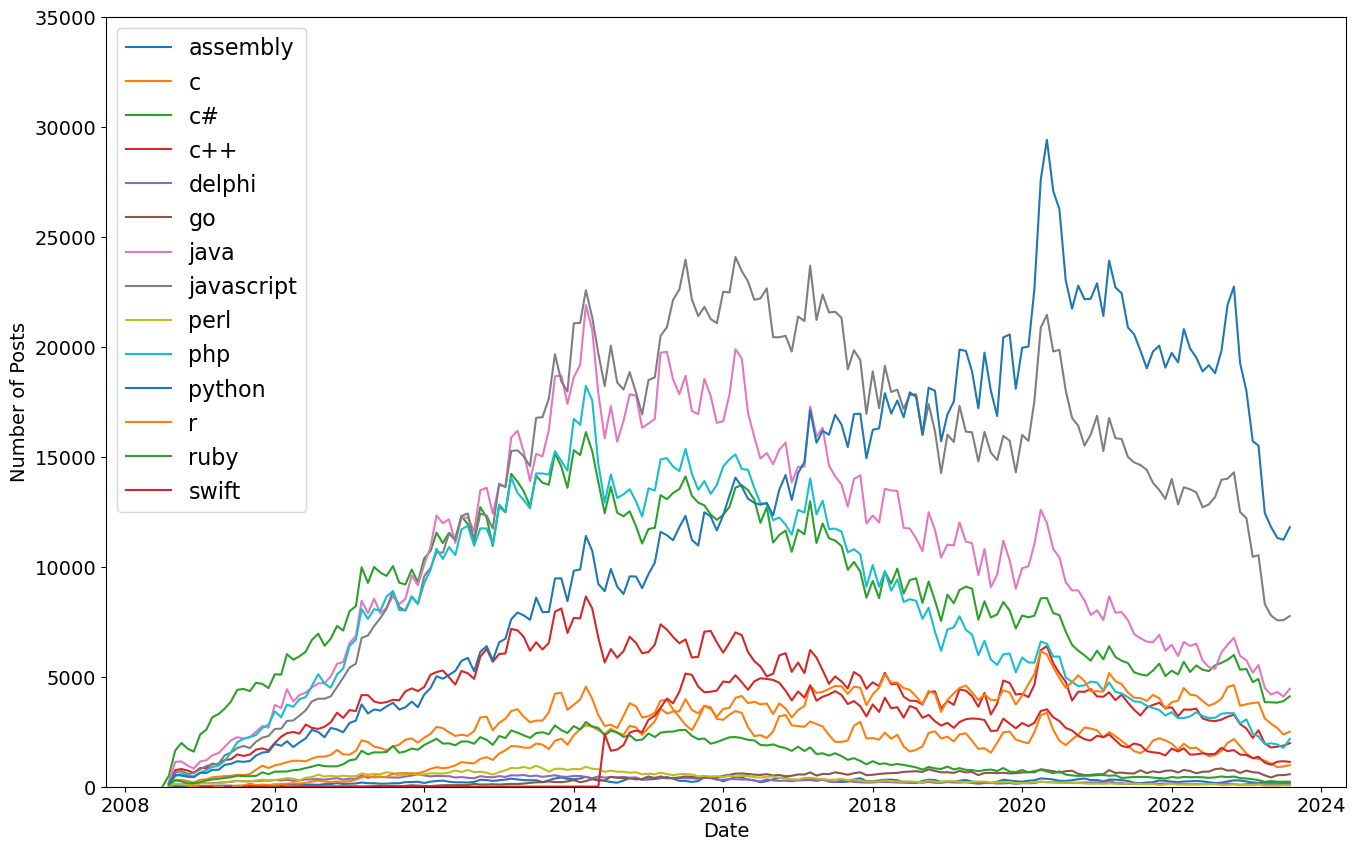

In [93]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
     plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name)
        
plt.legend(fontsize=16) 

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

AttributeError: module 'matplotlib.pyplot' has no attribute 'window'

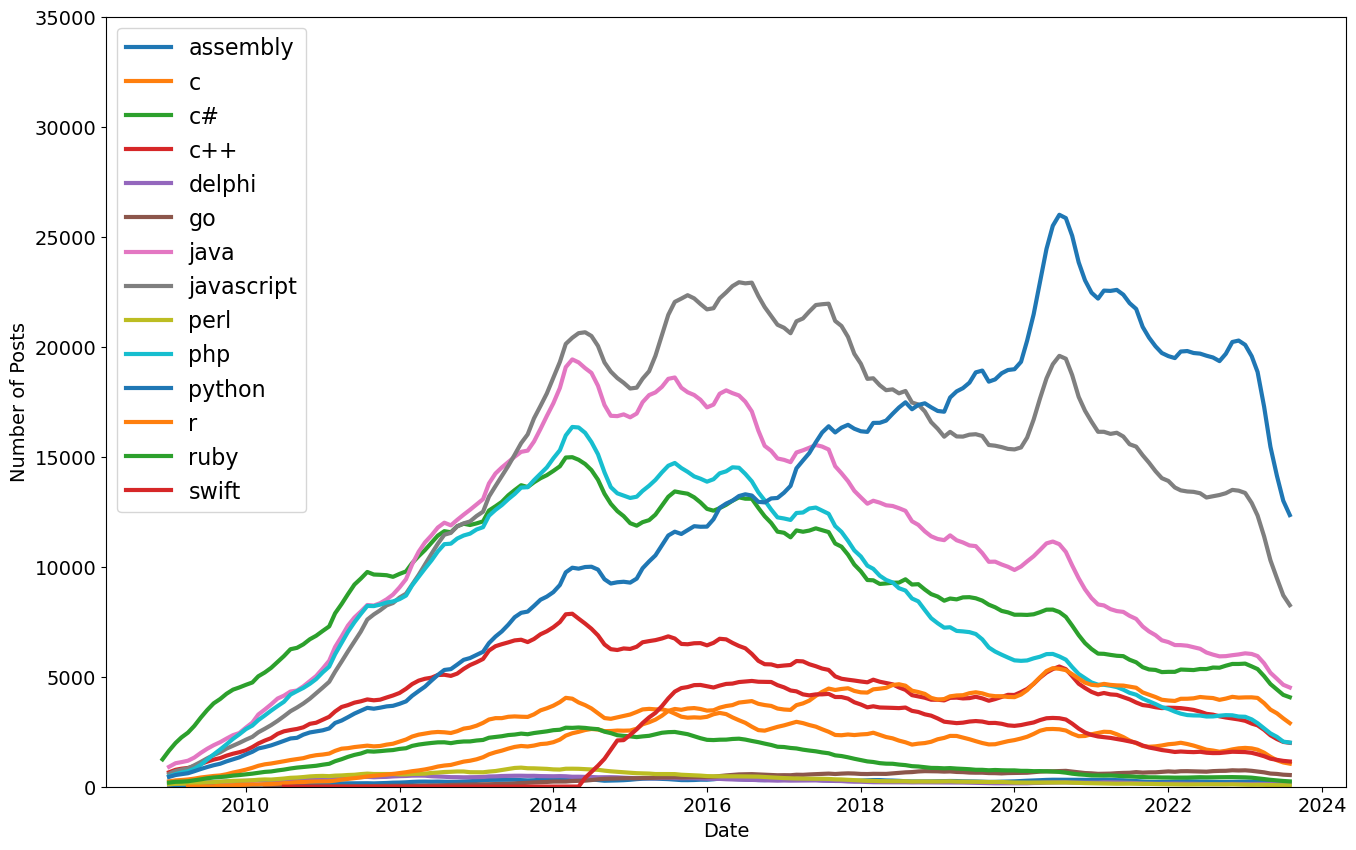

In [98]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)